In [111]:
# info here https://research.fb.com/prophet-forecasting-at-scale/
# https://facebookincubator.github.io/prophet/docs/quick_start.html

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
future_periods = 730

# regular usage

In [267]:
df = pd.read_csv('order_counts.csv',header=0,names=['ds','y'])
# df = pd.read_csv('ticket_counts.csv',header=0,names=['ds','y'])
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2015-01-01,12.345104
1,2015-01-02,12.035041
2,2015-01-03,12.206368
3,2015-01-04,12.185594
4,2015-01-05,11.942237


In [268]:
# m = Prophet(holidays=holidays)
m = Prophet()
m.fit(df)

In [269]:
future = m.make_future_dataframe(periods=future_periods)
future.tail()

,ds
1517,2019-02-26
1518,2019-02-27
1519,2019-02-28
1520,2019-03-01
1521,2019-03-02


In [270]:
forecast = m.predict(future)

In [271]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1517,2019-02-26,12.784589,12.547645,13.031201
1518,2019-02-27,12.802873,12.555100,13.042780
1519,2019-02-28,12.815939,12.568113,13.060286
1520,2019-03-01,12.938166,12.698412,13.160321
1521,2019-03-02,12.919421,12.666696,13.155531


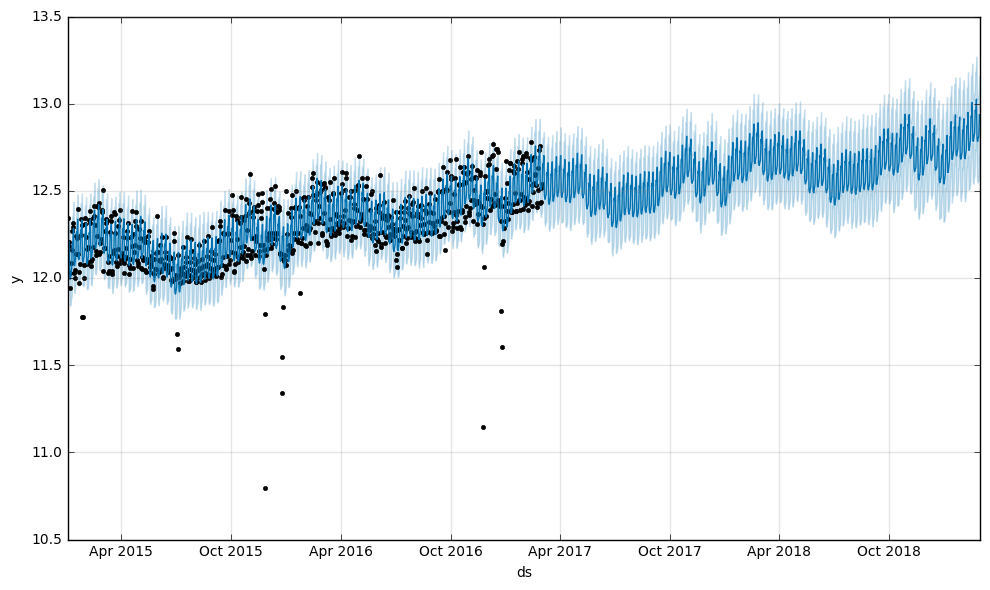

In [272]:
m.plot(forecast)

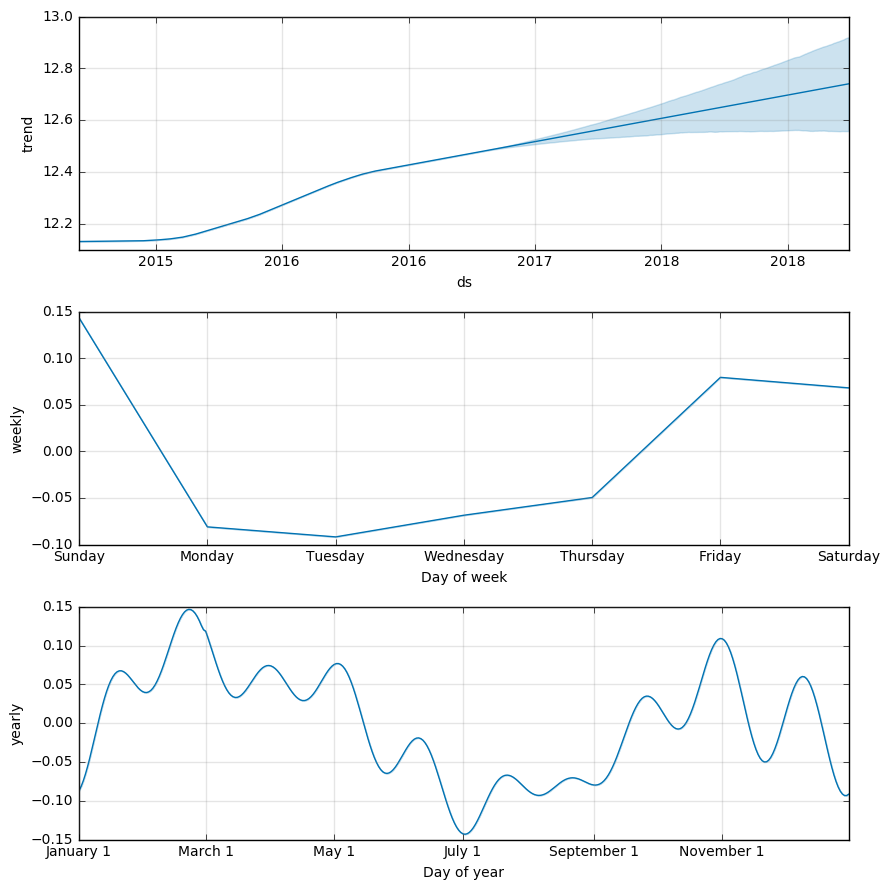

In [273]:
m.plot_components(forecast)

# let's try it with holidays

In [274]:
holidays = pd.read_csv('holidays.csv',sep='|',header=0)
holidays.head()

,ds,holiday,upper_window,lower_window
0,2009-01-01,holiday,0,0
1,2009-01-19,holiday,0,0
2,2009-01-20,holiday,0,0
3,2009-02-01,holiday,0,0
4,2009-02-12,holiday,0,0


In [123]:
df2 = pd.read_csv('sales_total.csv',header=0,names=['ds','y'])
df2['y'] = np.log(df2['y'])

In [124]:
m2 = Prophet(holidays=holidays)
m2.fit(df2)

In [125]:
future2 = m2.make_future_dataframe(periods=future_periods)

In [126]:
forecast2 = m2.predict(future2)

In [127]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1517,2019-02-26,16.245578,16.011862,16.469323
1518,2019-02-27,16.266542,16.039294,16.493005
1519,2019-02-28,16.286831,16.066867,16.515262
1520,2019-03-01,16.463366,16.239602,16.685739
1521,2019-03-02,16.441337,16.215353,16.654057


/Users/jseesel/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


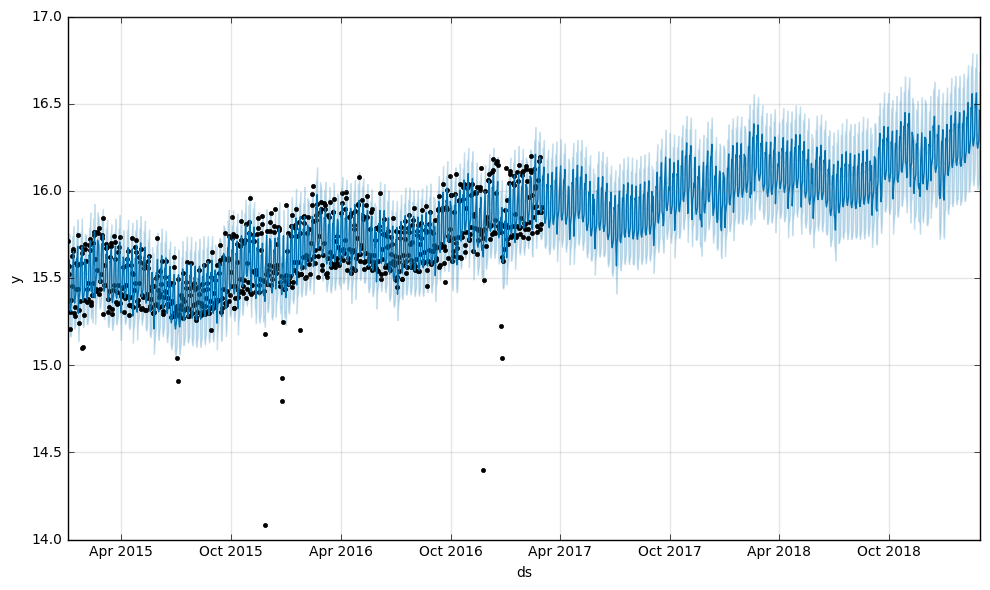

In [128]:
m2.plot(forecast2)

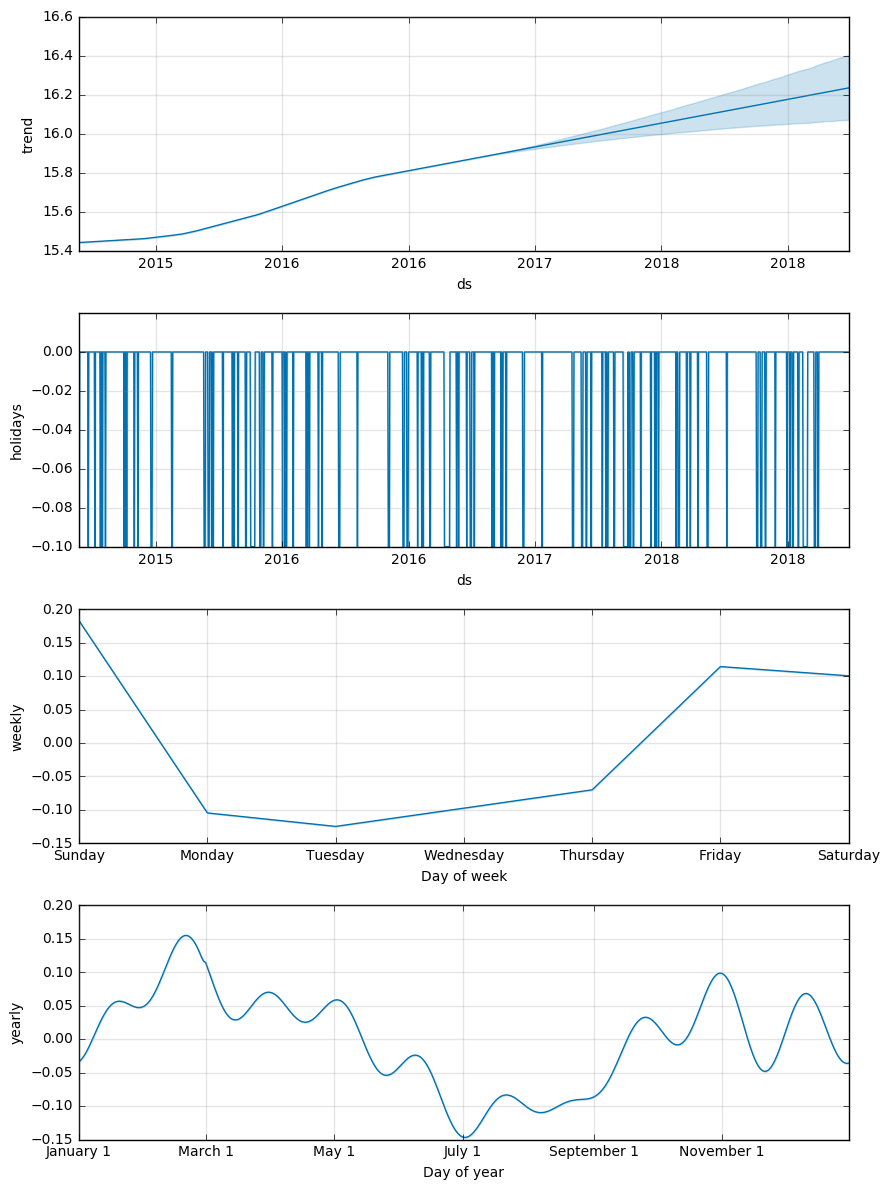

In [129]:
m2.plot_components(forecast2)

# add a cap and do logistic

In [4]:
df3 = pd.read_csv('resto_count.csv',header=0,names=['ds','y'])
df3 = df3[df3['ds'] >= '2011-01-01']
print max(df3['y'])
df3['y'] = np.log(df3['y'])
print max(df3['y'])
# df3['cap'] = 12

49097
10.8015532121


In [5]:
m3 = Prophet(growth='logistic')
m3 = Prophet()
m3.fit(df3)

In [6]:
future3 = m3.make_future_dataframe(periods=future_periods)
# future3['cap'] = 12

In [7]:
forecast3 = m3.predict(future3)

In [8]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2917,2018-12-27,11.240713,10.584894,11.956769
2918,2018-12-28,11.241737,10.583639,11.956580
2919,2018-12-29,11.242670,10.589078,11.956991
2920,2018-12-30,11.242002,10.581734,11.957455
2921,2018-12-31,11.241301,10.587508,11.959373


/Users/jseesel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jseesel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jseesel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

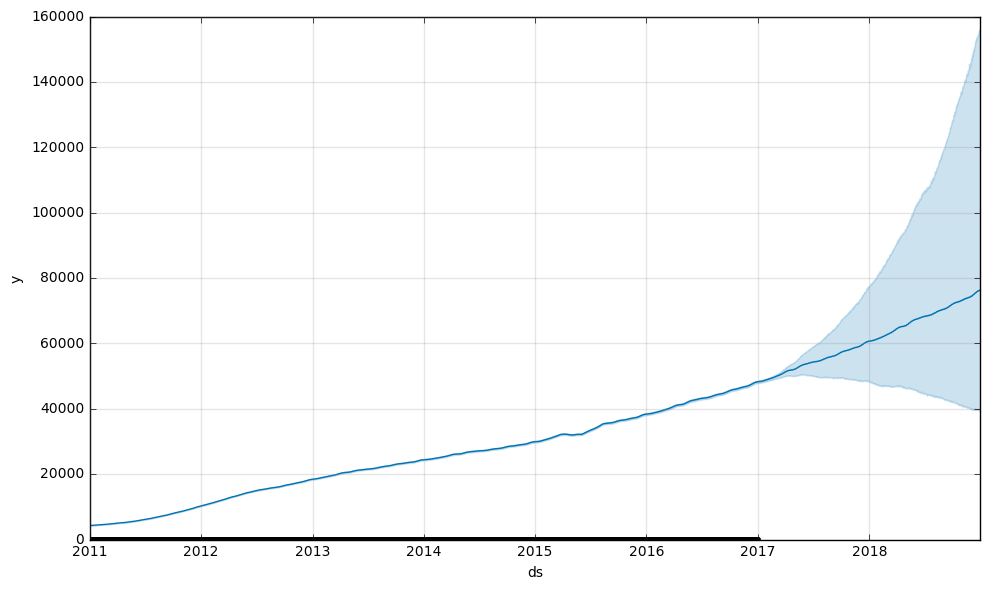

In [9]:
forecast3_nolog = forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast3_nolog['yhat'] = np.e**forecast3_nolog['yhat']
forecast3_nolog['yhat_lower'] = np.e**forecast3_nolog['yhat_lower']
forecast3_nolog['yhat_upper'] = np.e**forecast3_nolog['yhat_upper']
m3.plot(forecast3_nolog)

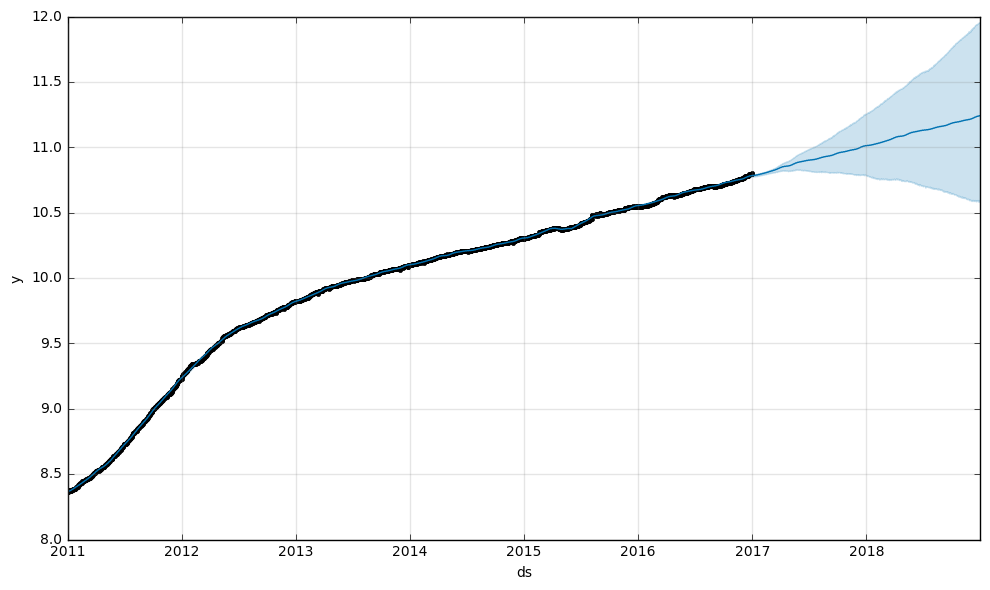

In [10]:
m3.plot(forecast3)

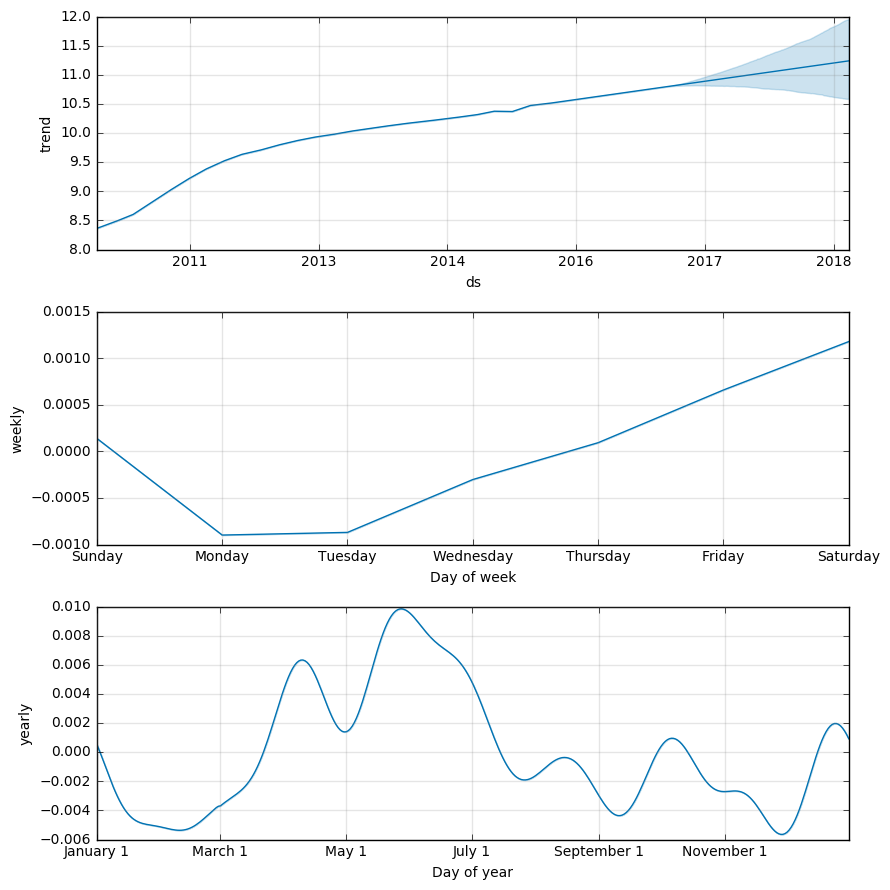

In [11]:
m3.plot_components(forecast3)

# hourly data works right?

In [246]:
# df4 = pd.read_csv('hourly_orders.csv',header=0,names=['ds','y'])
df4 = pd.read_csv('hourly_tickets.csv',header=0,names=['ds','y'])
print max(df4['y'])
df4['y'] = np.log(df4['y'])
print max(df4['y'])
cap4 = 10
df4['cap'] = cap4

6221
8.73568594452


In [247]:
m4 = Prophet(growth='logistic')
m4.fit(df4)

In [248]:
future4 = m4.make_future_dataframe(periods=(24*14), freq='H')
future4['cap'] = cap4

In [249]:
forecast4 = m4.predict(future4)

In [250]:
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4004,2017-03-17 01:00:00,7.965701,6.410441,9.484713
4005,2017-03-17 02:00:00,7.966114,6.483098,9.479749
4006,2017-03-17 03:00:00,7.966527,6.459537,9.604339
4007,2017-03-17 04:00:00,7.966941,6.472774,9.538966
4008,2017-03-17 05:00:00,7.967354,6.445014,9.602877


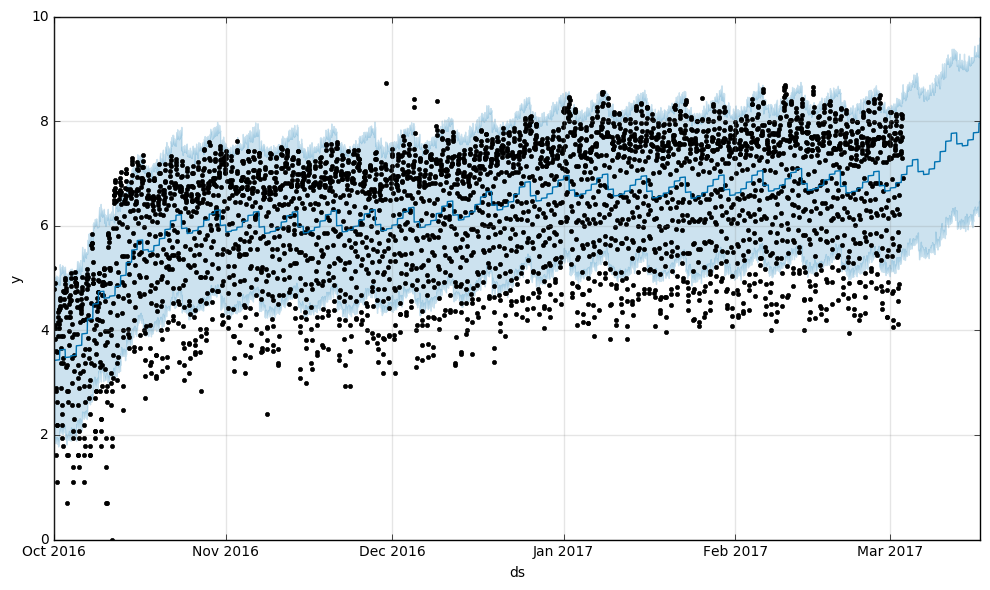

In [251]:
m4.plot(forecast4)

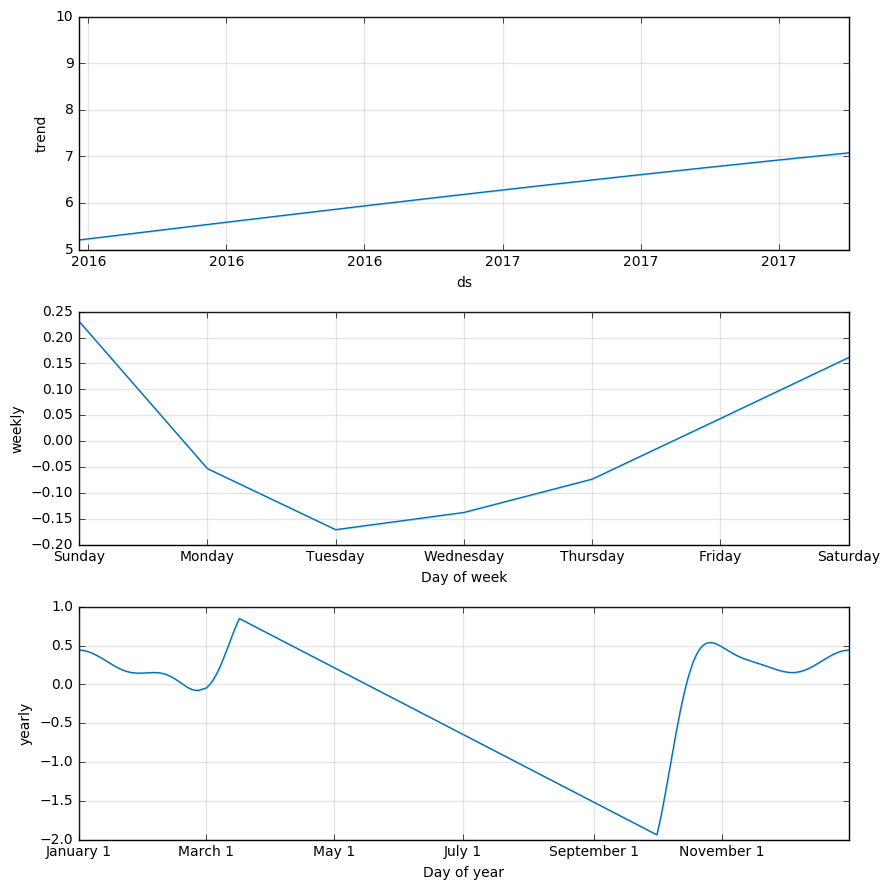

In [252]:
m4.plot_components(forecast4)